In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA RAPRESENTETION

In [15]:
wine_dataset=pd.read_csv('winequality_red.csv')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,NaN,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## DATA RESTORATION

In [8]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1507 non-null   float64
 1   volatile acidity      1524 non-null   float64
 2   citric acid           1508 non-null   float64
 3   residual sugar        1519 non-null   float64
 4   chlorides             1502 non-null   float64
 5   free sulfur dioxide   1505 non-null   float64
 6   total sulfur dioxide  1517 non-null   float64
 7   density               1530 non-null   float64
 8   pH                    1515 non-null   float64
 9   sulphates             1514 non-null   float64
 10  alcohol               1526 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


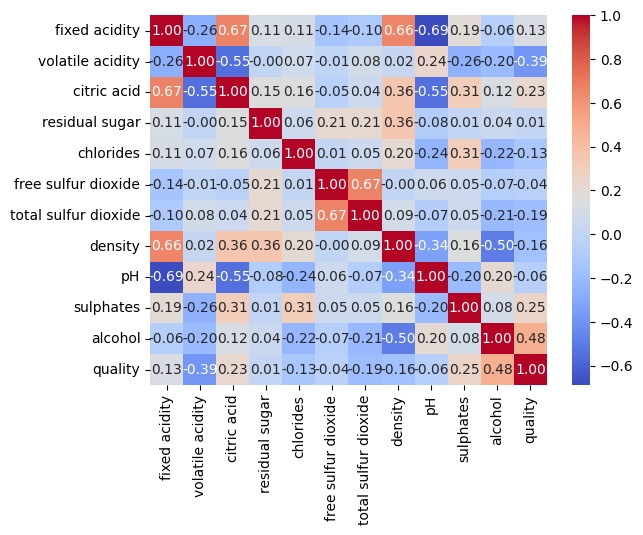

In [16]:
corr_matrix = wine_dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [18]:
pos_strong_related = np.where((np.triu(corr_matrix, k=1) > 0.65) | (np.triu(corr_matrix, k=1) < -0.65))

# Creare un dataframe con le colonne e i valori di correlazione più alti
df_strong_corr = pd.DataFrame({
    'Colonna1': corr_matrix.columns[pos_strong_related[0]],
    'Colonna2': corr_matrix.columns[pos_strong_related[1]],
    'Correlazione': corr_matrix.values[pos_strong_related]
})

# Visualizzare il dataframe delle correlazioni più alte
print(df_strong_corr)

              Colonna1              Colonna2  Correlazione
0        fixed acidity           citric acid      0.669252
1        fixed acidity               density      0.662714
2        fixed acidity                    pH     -0.688157
3  free sulfur dioxide  total sulfur dioxide      0.669175


## Data Restoration Process

The restoration of citric acid, density, and pH will be performed by averaging values from wines with similar fixed acidity. The same approach will be applied to sulfurs and acidity. This process will be executed for the following parameters:

1. **Citric Acid**
2. **Density**
3. **pH**
4. **Sulfurs**
5. **Acidity**

For the remaining items (volatile acidity, residual sugar, chlorides, sulphates, and alcohol), the restoration is not yet defined.